In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import os

In [12]:
!ls data

budapest_connectome_3.0_209_0_median.csv
budapest_connectome_3.0_209_0_median.graphml
budapest_connectome_3.0_209_0_median_fc.csv
graph_data_1.csv
graph_data_ec.csv
graph_data_ec_1.csv
graph_data_ec_2.csv
graph_data_fc.csv


In [13]:
# Load the data from the provided CSV file
# current_dir = 
count_file_path = f'data/budapest_connectome_3.0_209_0_median_fc.csv'
length_file_path = f'data/budapest_connectome_3.0_209_0_median.csv'

df_count = pd.read_csv(count_file_path, delimiter=';')
df_len = pd.read_csv(length_file_path, delimiter=';')

In [14]:
df_count.head()

,id node1,id node2,name node1,name node2,parent id node1,parent id node2,parent name node1,parent name node2,edge confidence,edge weight(med nof)
0,127,504,rh.caudalmiddlefrontal_11,Right-Putamen,9,37,ctx-rh-caudalmiddlefrontal,Right-Putamen,411,25.0
1,127,145,rh.caudalmiddlefrontal_11,rh.precentral_19,9,10,ctx-rh-caudalmiddlefrontal,ctx-rh-precentral,294,5.0
2,127,131,rh.caudalmiddlefrontal_11,rh.caudalmiddlefrontal_6,9,9,ctx-rh-caudalmiddlefrontal,ctx-rh-caudalmiddlefrontal,327,8.0
3,127,494,rh.caudalmiddlefrontal_11,rh.insula_10,9,34,ctx-rh-caudalmiddlefrontal,ctx-rh-insula,328,6.0
4,127,189,rh.caudalmiddlefrontal_11,rh.caudalanteriorcingulate_5,9,13,ctx-rh-caudalmiddlefrontal,ctx-rh-caudalanteriorcingulate,217,3.0


In [15]:
df_len.head()

,id node1,id node2,name node1,name node2,parent id node1,parent id node2,parent name node1,parent name node2,edge confidence,edge weight(med flm)
0,127,504,rh.caudalmiddlefrontal_11,Right-Putamen,9,37,ctx-rh-caudalmiddlefrontal,Right-Putamen,411,22.239342
1,127,145,rh.caudalmiddlefrontal_11,rh.precentral_19,9,10,ctx-rh-caudalmiddlefrontal,ctx-rh-precentral,294,18.400002
2,127,131,rh.caudalmiddlefrontal_11,rh.caudalmiddlefrontal_6,9,9,ctx-rh-caudalmiddlefrontal,ctx-rh-caudalmiddlefrontal,327,18.400001
3,127,494,rh.caudalmiddlefrontal_11,rh.insula_10,9,34,ctx-rh-caudalmiddlefrontal,ctx-rh-insula,328,17.400008
4,127,189,rh.caudalmiddlefrontal_11,rh.caudalanteriorcingulate_5,9,13,ctx-rh-caudalmiddlefrontal,ctx-rh-caudalanteriorcingulate,217,22.000011


In [18]:
df_merged = pd.merge(df_count, df_len, how='inner',
                     left_on=['parent id node1', 'parent id node2'],
                     right_on=['parent id node1', 'parent id node2'])

df_merged = df_merged[['parent id node1', 'parent id node2', 'edge weight(med nof)', 'edge weight(med flm)']]
df_merged = df_merged.rename(columns={'parent id node1':'node1', 'parent id node2':'node2', 'edge weight(med nof)':'fiber_count', 'edge weight(med flm)':'fiber_length'})
df_merged.head()

,node1,node2,fiber_count,fiber_length
0,9,37,25.0,22.239342
1,9,37,25.0,26.385718
2,9,37,25.0,36.416003
3,9,37,25.0,32.376669
4,9,37,25.0,27.144929


In [19]:
l = df_merged["node1"].astype('int')
max(l)

83

In [20]:
# Extract the necessary information
nodes = np.union1d(df_merged['node1'].values, df_merged['node2'].values)
num_nodes = len(nodes)
edges = list(zip(df_merged['node1'], df_merged['node2']))

print(f"# nodes:{num_nodes}, # edges:{len(edges)}")

# nodes:76, # edges:11288


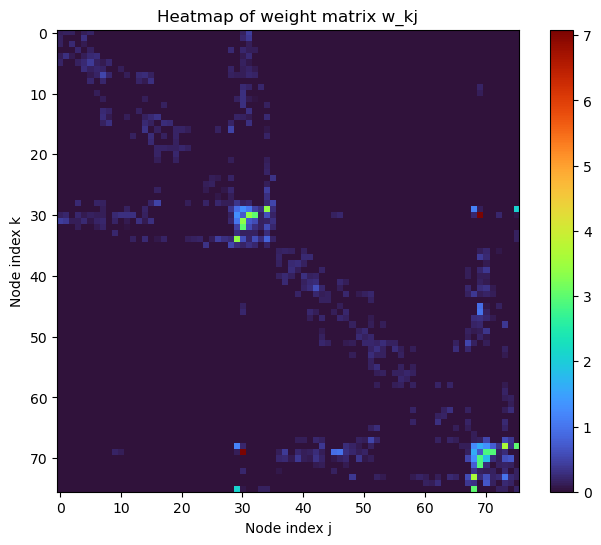

In [22]:
# Create a mapping from node ID to index
node_to_index = {node_id: index for index, node_id in enumerate(nodes)}

w_kj = np.zeros((num_nodes, num_nodes))
        

for _, row in df_merged.iterrows():
    idx1 = node_to_index[row['node1']]
    idx2 = node_to_index[row['node2']]
    weight = row['fiber_count']/row['fiber_length']
    w_kj[idx1, idx2] = weight
    w_kj[idx2, idx1] = weight

# Plotting the heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(w_kj, cmap='turbo')
plt.colorbar(heatmap)
plt.title('Heatmap of weight matrix w_kj')
plt.xlabel('Node index j')
plt.ylabel('Node index k')
plt.show()

## Resting state dynamics

In [6]:
! ls data

budapest_connectome_3.0_209_0_median.csv
budapest_connectome_3.0_209_0_median.graphml
graph_data_1.csv
graph_data_ec.csv
graph_data_ec_1.csv
graph_data_ec_2.csv
graph_data_fc.csv


In [8]:
file_path = f'data/budapest_connectome_3.0_209_0_median.csv'
data = pd.read_csv(file_path, delimiter=';')
data.head()

,id node1,id node2,name node1,name node2,parent id node1,parent id node2,parent name node1,parent name node2,edge confidence,edge weight(med flm)
0,127,504,rh.caudalmiddlefrontal_11,Right-Putamen,9,37,ctx-rh-caudalmiddlefrontal,Right-Putamen,411,22.239342
1,127,145,rh.caudalmiddlefrontal_11,rh.precentral_19,9,10,ctx-rh-caudalmiddlefrontal,ctx-rh-precentral,294,18.400002
2,127,131,rh.caudalmiddlefrontal_11,rh.caudalmiddlefrontal_6,9,9,ctx-rh-caudalmiddlefrontal,ctx-rh-caudalmiddlefrontal,327,18.400001
3,127,494,rh.caudalmiddlefrontal_11,rh.insula_10,9,34,ctx-rh-caudalmiddlefrontal,ctx-rh-insula,328,17.400008
4,127,189,rh.caudalmiddlefrontal_11,rh.caudalanteriorcingulate_5,9,13,ctx-rh-caudalmiddlefrontal,ctx-rh-caudalanteriorcingulate,217,22.000011


In [10]:
# Extract the necessary information
nodes = np.union1d(data['parent id node1'].values, data['parent id node2'].values)
num_nodes = len(nodes)
edges = list(zip(data['parent id node1'], data['parent id node2']))
print(num_nodes, len(edges))

w_kj = np.zeros((num_nodes, num_nodes))

# Create a mapping from node ID to index
node_to_index = {node_id: index for index, node_id in enumerate(nodes)}

for _, row in data.iterrows():
    idx1 = node_to_index[row['parent id node1']]
    idx2 = node_to_index[row['parent id node2']]
    weight = row['edge weight(med flm)']
    w_kj[idx1, idx2] = weight
    w_kj[idx2, idx1] = weight

76 1000


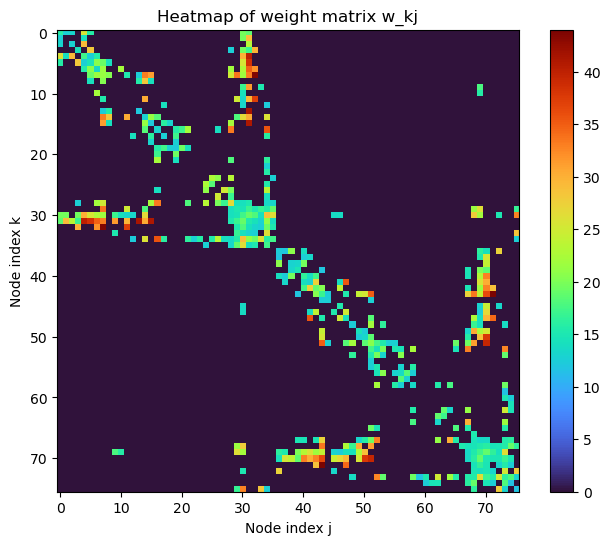

In [11]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(w_kj, cmap='turbo')
plt.colorbar(heatmap)
plt.title('Heatmap of weight matrix w_kj')
plt.xlabel('Node index j')
plt.ylabel('Node index k')
plt.show()